> source /gpfs/slac/lsst/fs2/u1/dh/software/centos7-gcc48/prod/release/setup.sh

> jupyter notebook

In [1]:
%matplotlib inline
import numpy as np
from get_EO_analysis_results import get_EO_analysis_results
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import scipy.stats as stats

from astropy.table import Table
import pylab
import numpy

raft_types = {}
raft_types['e2v'] = 'R11 R12 R13 R14 R21 R22 R23 R24 R30 R31 R32 R33 R34'.split()
raft_types['ITL'] = 'R01 R02 R03 R10 R20 R41 R42 R43'.split()
raft_types['Corner'] = 'R00 R04 R40 R44'.split()

EO = get_EO_analysis_results(db='Prod')

def compare2runs( botrun1, botrun2 ):
    dev_list1, data1 = EO.get_tests(site_type='I&T-BOT', run=botrun1)
    botresults1 = EO.get_all_results(data1)
    dev_list2, data2 = EO.get_tests(site_type='I&T-BOT', run=botrun2)
    botresults2 = EO.get_all_results(data2)

    return botresults1, botresults2

In [2]:
botrun1 = "13040"
botrun2 = "13043"
ret = compare2runs(botrun1,botrun2)
ret[0].keys()

odict_keys(['cti_low_parallel_error', 'cti_low_serial', 'cti_high_parallel', 'cti_high_serial_error', 'cti_high_serial', 'cti_low_parallel', 'cti_high_parallel_error', 'cti_low_serial_error', 'read_noise', 'total_noise', 'system_noise'])

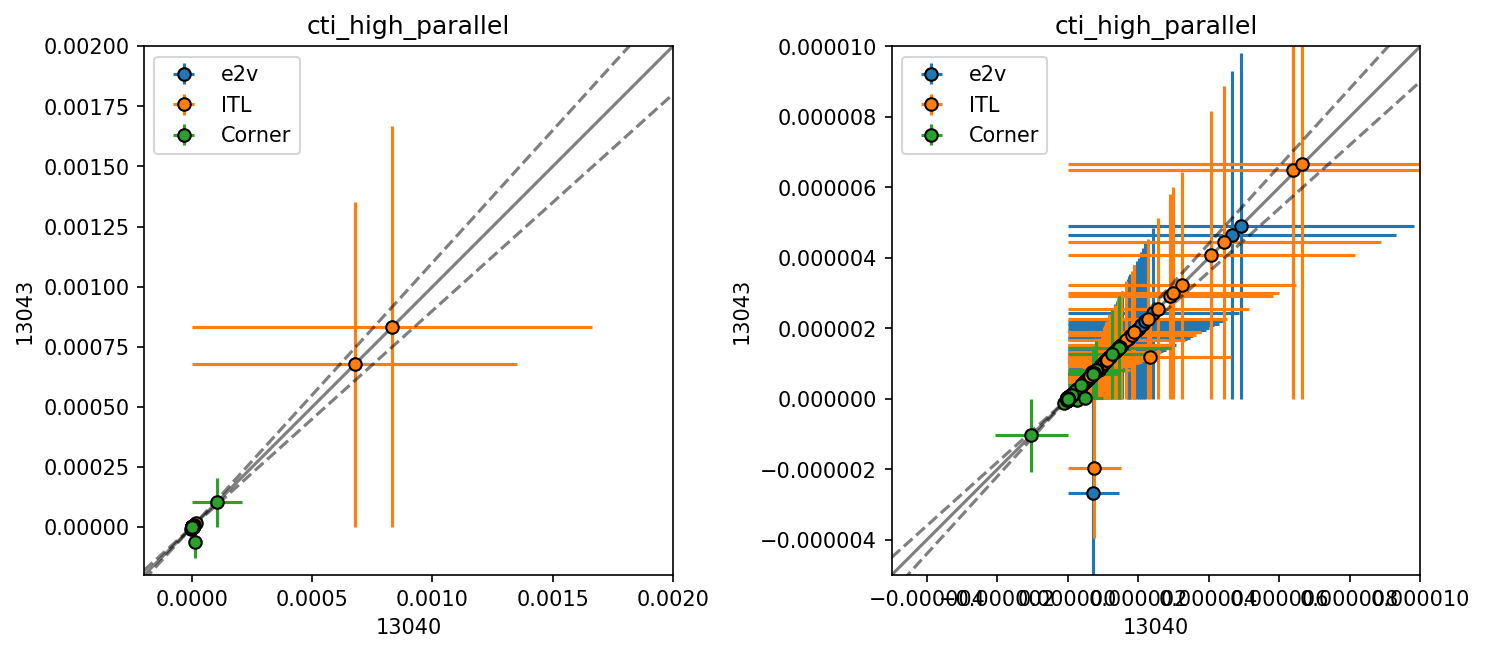

In [3]:
### pick an item and set a range
akey, lim = "cti_high_parallel", [ (-2e-4, 2e-3), (-.5e-5, 1e-5) ]
#akey, lim = "cti_high_serial", [ (-2e-3, 1e-2), (-2e-5, 2e-4) ]

errkey = akey+"_error"
aresult = ret[0][akey]
bresult = ret[1][akey]
fig, axs = pylab.subplots(1,2,figsize=(10,5),dpi=150,facecolor="white")
data = { }
for atype in raft_types:
    data[atype] = { "x":[], "y": [], "xerr": [], "yerr": [] }
    for abay in raft_types[atype]:
        for asensor in aresult[abay]:
            data[atype]["x"].extend(aresult[abay][asensor])
            data[atype]["y"].extend(bresult[abay][asensor])
            try:
                data[atype]["xerr"].extend(aresult[abay][asensor])
                data[atype]["yerr"].extend(bresult[abay][asensor])
            except:
                pass

for ax in axs:
    for atype in raft_types:
        ax.errorbar(
            data[atype]["x"],
            data[atype]["y"],
            xerr=data[atype]["xerr"],
            yerr=data[atype]["yerr"],
            fmt="o", mec="k", label=atype )        

for ax, (scalemin, scalemax) in zip(axs, lim ):
    x=numpy.arange(scalemin,scalemax*1.01,(scalemax-scalemin)/100)
    params = {"color":"k","alpha":0.5}
    ax.plot(x,x*1.1, ls="--", **params)
    ax.plot(x,x, ls="-", **params)
    ax.plot(x,x*0.9, ls="--", **params)
    ax.legend()
    ax.set_ylim(scalemin,scalemax)
    ax.set_xlim(scalemin,scalemax)
    ax.set_xlabel(botrun1)
    ax.set_ylabel(botrun2)
    ax.set_aspect(1)
    ax.set_title(akey)

pylab.tight_layout()
pylab.show()